In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import collections
from skimage.metrics import structural_similarity as ssim

In [11]:
def createTemplates():
    """
    הפונקציה יוצרת תבניות שישמשו לשם השוואה בינן ובין תמנות הספרות שנחלץ מתמונת הלוחית
    """
    one = cv2.imread('1.bmp',0)
    two = cv2.imread('2.bmp',0)
    three = cv2.imread('3.bmp',0)
    four = cv2.imread('4.bmp',0)
    five = cv2.imread('5.bmp',0)
    six = cv2.imread('6.bmp',0)
    seven = cv2.imread('7.bmp',0)
    eight = cv2.imread('8.bmp',0)
    nine = cv2.imread('9.bmp',0)
    zero = cv2.imread('0.bmp',0)
    #יצירת מערך שמכיל את כל תמונות הספרות
    templates = [zero, one, two, three, four, five, six, seven, eight, nine]
    return templates

In [12]:
def checksim(img, templates):
    """
    הפונקציה בודקת עבור כל ספרה שחולצה מהלוחית לאיזו תבנית מבין תמונות הספרות הנתונות היא הכי דומה
    """
    width = img.shape[1]
    height = img.shape[0]
    dim = (width, height)
    sim = 0
    digit = -1
    i = 0
    for tmp in templates:
        #שינוי מימדי התבנית כך שיתאימו לממדי התמונה שחולצה מהלוחית
        resized = cv2.resize(tmp, dim, interpolation = cv2.INTER_AREA)
        #שימוש בפוקנציה שבודקת את מידת ההתאמה בין שתי תמונות
        err = ssim(img, resized)
        if err > sim:
                   sim = err
                   digit = i
        i = i + 1
    return digit

1234590


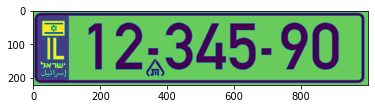

In [14]:
im = cv2.imread('LP_STANDARD.jpg',0)

plt.imshow(im)
#חיתוך בסף והפיכת התמונה לבינארית
thresh = cv2.threshold(im,127,255,cv2.THRESH_BINARY)[1]

#מציאת העצמים הקיימים בתמונה
contours = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)[0]

arr = []

xcnt = []

plate = ''

#קריאה לפונקציה שיוצרת את תבניות הספרות
templates = createTemplates()

img_size = thresh.shape[0] * thresh.shape[1]

#הפיכת השחור והלבן בתמונה כך שהספרות יתאימו לצבע הספרות בתבנית
thresh2 = cv2.subtract(255, thresh)

for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w < h/1.5 and w*h * 50 > img_size:
        #גזירת תמונת הספרה על ידי שימוש בערכי הגובה הרוחב והקורדינטות
        crop_img = thresh2[y:y+h, x:x+w]
        digit = checksim(crop_img, templates)
        arr.append(digit)
        #שמירת הקורדינטות של תמונות הספרות לשם מיון הספרות בהמשך
        xcnt.append(x)

#יצירת מילון כך שהמפתחות הם מחרוזת הקורדינטות על הציר האנכי והערכים הם ערכי ספרות הלוחית
dic = {} 
for key in xcnt: 
    for value in arr: 
        dic[key] = value 
        arr.remove(value) 
        break  
#מיון ערכי המילון לפי ערכי המפתח כך שההנחה היא שככל שערך הקורדינטה האנכית נמוך יותר, מסתבר שהספרה שנמצאת בקורדינטה היא הקודמת בסדר כיוון שהיא ימנית יותר
sort_dict = collections.OrderedDict(sorted(dic.items()))


#המרת ערכי המילון למחרוזת
for k, v in sort_dict.items():
    plate = plate + str(v)

#הדפסת מספר לוחית הרישוי    
print(plate)